# Notebook to develop understanding of the literature on residual circulation, TEM, TRM, STEM etc. 

In [49]:
# load appropriate modules
import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
%matplotlib inline
from xgcm import Grid
from scipy import linalg as lin
from scipy import signal as sig
from scipy import fftpack as fft
from scipy import interpolate as naiso
from matplotlib import colors, ticker, cm
import xrft
#import gsw
import os
import os.path as op

In [50]:
data_dir = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run/'

In [51]:
model_vars = ['uVeltave','vVeltave','wVeltave', 'Ttave', 
             'UTtave', 'VTtave','WTtave','UUtave', 'UVtave',
              'VVtave', 'TTtave', 'tFluxtave']

ds = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/utils.py:423: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [4]:
ds_layers = open_mdsdataset(data_dir,  delta_t=300, prefix=['DiagLAYERS-transport','DiagLAYERS-diapycnal']
                 ,ignore_unknown_vars=True)


ds_trend = open_mdsdataset(data_dir,  
                         delta_t=300, prefix=['DiagLAYERS-trend']
                 ,ignore_unknown_vars=True)

In [54]:
ds.time/24/3600/360

<xarray.DataArray 'time' (time: 13)>
array([ 55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110.,
       115.])
Coordinates:
    iter     (time) int64 dask.array<shape=(13,), chunksize=(1,)>
  * time     (time) int64 1710720000 1866240000 ... 3421440000 3576960000

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


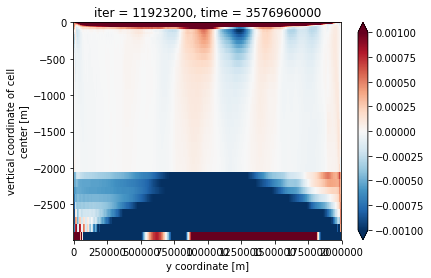

In [11]:
ds.vVeltave.where(ds.hFacS==1).isel(time=-1).mean('XC').plot(vmin=-0.001)

In [12]:
grid = Grid(ds, periodic='X')

In [ ]:
# Mean streamfunctions, and what is wrong with them. 

In [41]:
psix =  - grid.cumsum(ds.uVeltave * ds.drF, 'Z', boundary='extend') + (ds.uVeltave * ds.drF).sum('Z')
psiy =  - grid.cumsum(ds.vVeltave * ds.drF, 'Z', boundary='extend') + (ds.vVeltave * ds.drF).sum('Z')

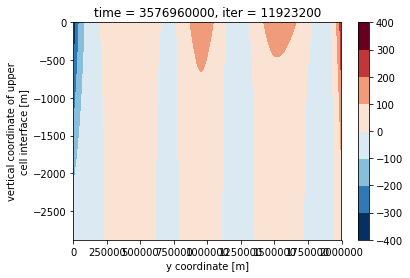

In [42]:
psix.isel(time=-1).mean('XG').plot.contourf(levels=10)

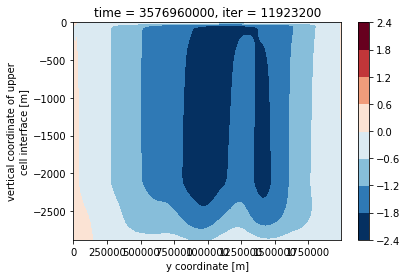

In [43]:
psiy.isel(time=-1).mean('XC').plot.contourf(levels=10)

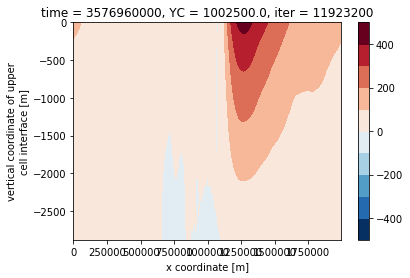

In [44]:
psix.isel(time=-1).sel(YC=1000e3, method='nearest').plot.contourf(levels=10)

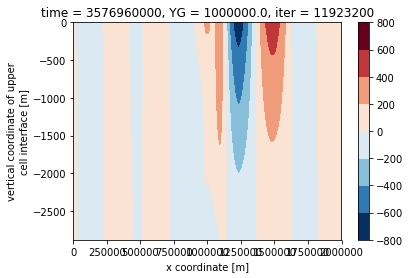

In [45]:
psiy.isel(time=-1).sel(YG=1000e3, method='nearest').plot.contourf(levels=10)

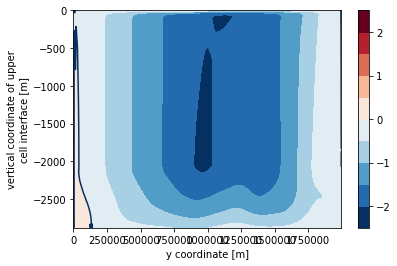

In [48]:
psiy.mean(['XC', 'time']).plot.contourf(levels=10)
psiy.mean(['XC', 'time']).plot.contour(levels=[0])

In [35]:
# Quasi-Stokes Stream Function 